**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder


**Loading Dataset**

In [2]:
df = pd.read_csv(r"C:\Users\fastf\Downloads\sms dataset\spam.csv", encoding="latin-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
df = df[['v1', 'v2']]       
df.columns = ['label', 'message']   


In [7]:
print(df['label'].value_counts())  

label
ham     4825
spam     747
Name: count, dtype: int64


**Data visualization**

([<matplotlib.patches.Wedge at 0x26cc6b89430>,
 [Text(-0.44971325876899215, -1.0038714981945516, 'ham'),
  Text(0.4701548196619535, 1.0495019988302243, 'spam')],
 [Text(-0.24529814114672294, -0.5475662717424826, '86.6%'),
  Text(0.2657396806784954, 0.593196781947518, '13.4%')])

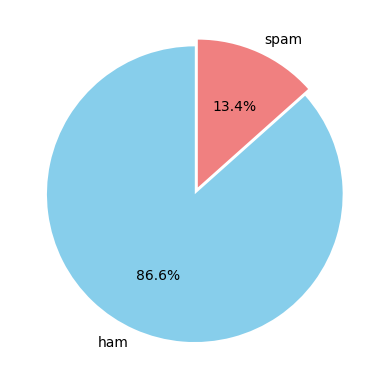

In [8]:

counts = df['label'].value_counts()

plt.pie(
    counts, 
    labels=counts.index, 
    autopct='%1.1f%%', 
    colors=['skyblue','lightcoral'], 
    startangle=90,
    explode=(0,0.05)  
)


C:\Users\fastf\AppData\Local\Temp\ipykernel_11288\1575302485.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette=['skyblue','lightcoral'])


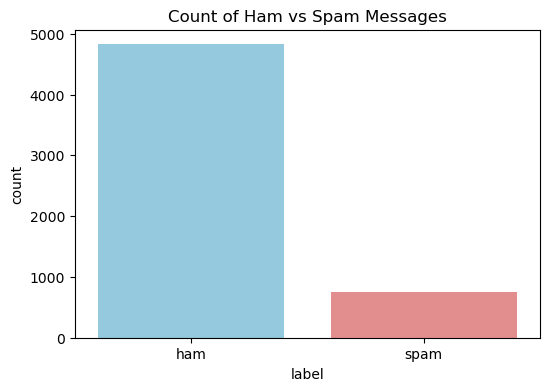

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette=['skyblue','lightcoral'])
plt.title("Count of Ham vs Spam Messages")
plt.show()


**Data preprocessing**

In [10]:
# Text cleaning

In [11]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [12]:
df['cleaned_message'] = df['message'].apply(clean_text)


In [13]:
#Stopwords removal

In [14]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fastf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def remove_stopwords(text):
    words = text.split()                      
    words = [word for word in words if word not in stop_words]  
    return ' '.join(words)                   


In [16]:
#Tokenization

In [17]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_message'])
sequences = tokenizer.texts_to_sequences(df['cleaned_message'])
X = pad_sequences(sequences, maxlen=100, padding='post')


In [18]:
#Label encoding

In [19]:
le = LabelEncoder()
y = le.fit_transform(df['label'])

**Train test split**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Building the model**

In [21]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\fastf\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [22]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=5, batch_size=64, verbose=1)


Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 144ms/step - accuracy: 0.8438 - loss: 0.3923 - val_accuracy: 0.9758 - val_loss: 0.0900
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - accuracy: 0.9831 - loss: 0.0587 - val_accuracy: 0.9830 - val_loss: 0.0714
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.9947 - loss: 0.0211 - val_accuracy: 0.9821 - val_loss: 0.0780
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.9957 - loss: 0.0123 - val_accuracy: 0.9812 - val_loss: 0.0999
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.9985 - loss: 0.0057 - val_accuracy: 0.9794 - val_loss: 0.1043


**Evaluating the model**

In [23]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9787 - loss: 0.0956
Test Accuracy: 0.98


**Model evaluation**

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step
              precision    recall  f1-score   support

         Ham       0.98      0.99      0.99       965
        Spam       0.94      0.90      0.92       150

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



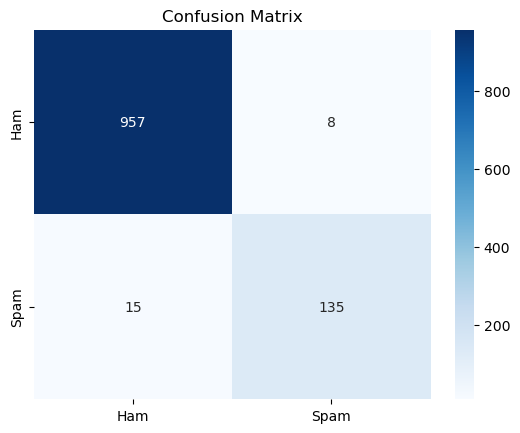

In [24]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred, target_names=['Ham','Spam']))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.title("Confusion Matrix")
plt.show()


In [25]:
model.save("spam_classifier.h5")


**Prediction on new messages**

In [26]:
def predict_message(msg, threshold=0.5):
    
    seq = tokenizer.texts_to_sequences([msg])
    padded = pad_sequences(seq, maxlen=100, padding='post')

    
    spam_prob = float(model.predict(padded, verbose=0)[0][0])  

   
    label = "Spam" if spam_prob > threshold else "Ham"

    
    confidence = spam_prob if label == "Spam" else 1 - spam_prob

    
    return f"{label} (Spam prob: {spam_prob:.4f}, Ham prob: {1-spam_prob:.4f}, Confidence: {confidence*100:.2f}%)"



print(predict_message("Ok lar... Joking wif u oni..."))
print(predict_message("SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"))


Ham (Spam prob: 0.0000, Ham prob: 1.0000, Confidence: 100.00%)
Spam (Spam prob: 1.0000, Ham prob: 0.0000, Confidence: 100.00%)


**Visualizing the model**

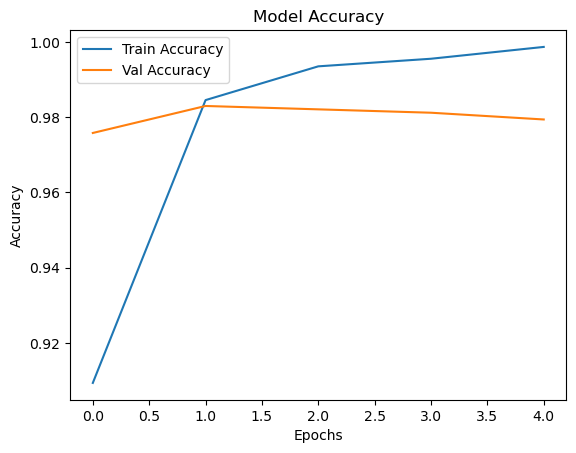

In [27]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




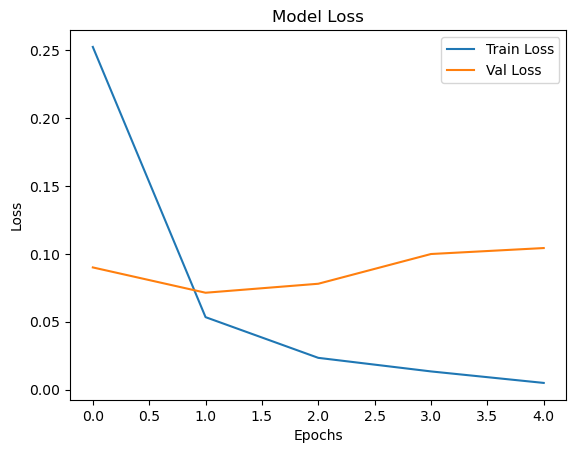

In [28]:

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
import pickle


with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


**Save this as app.py**

In [4]:
import streamlit as st
import tensorflow as tf
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load model
model = tf.keras.models.load_model("spam_classifier.h5", compile=False)

# Load tokenizer
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# Max sequence length (should be same as used in training)
MAX_LEN = 100  

st.title("📧 Spam Message Detector")

# User input
message = st.text_area("Enter a message:")

if st.button("Predict"):
    if message.strip() != "":
        # Convert message to sequence
        seq = tokenizer.texts_to_sequences([message])
        padded = pad_sequences(seq, maxlen=MAX_LEN, padding="post", truncating="post")

        # Predict
        prediction = model.predict(padded)
        prob = float(prediction[0][0])

        if prob > 0.5:
            st.error(f"🚨 Spam detected! (Confidence: {prob:.2f})")
        else:
            st.success(f"✅ Ham (Not Spam) (Confidence: {1-prob:.2f})")
    else:
        st.warning("Please enter a message before predicting.")
